In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
# Determinar la fila donde comienza la data
!head -n 411 avghigh_ray.fld08 | tail -n 4

head: no se puede abrir 'avghigh_ray.fld08' para lectura: No existe el fichero o el directorio


In [1]:
def load_data(file_name,headers):
    """
    Load data from an external file.
    
    Arguments:
    ----------
    file_name (str) : name of the data file to load
    headers (int)   : row where data starts (skips headers).
    
    Returns:
    --------
    data (array)  : array with loaded data.
    """
    data = numpy.loadtxt(fname=file_name,skiprows=headers)
    return data

In [85]:
data = load_data('high_ray.fld02',409)

In [81]:
data_rms = load_data('rmshigh_ray.fld08',409)

In [82]:
data_avg = load_data('avghigh_ray.fld08',409)

In [83]:
print(data_avg)
print(data_rms)

[[-0.125      -0.135      -0.5        ...,  0.0458134   0.5         0.        ]
 [-0.1249709  -0.135      -0.5        ...,  0.04581414  0.4974385   0.        ]
 [-0.1249062  -0.135      -0.5        ...,  0.04581537  0.4917514   0.        ]
 ..., 
 [ 0.1249062   0.135       0.5        ...,  0.04581537 -0.4917514   0.        ]
 [ 0.1249709   0.135       0.5        ...,  0.04581414 -0.4974385   0.        ]
 [ 0.125       0.135       0.5        ...,  0.0458134  -0.5         0.        ]]
[[-0.125      -0.135      -0.5        ...,  0.00209808  0.25        0.        ]
 [-0.1249709  -0.135      -0.5        ...,  0.00209815  0.2474451   0.        ]
 [-0.1249062  -0.135      -0.5        ...,  0.00209826  0.2418194   0.        ]
 ..., 
 [ 0.1249062   0.135       0.5        ...,  0.00209826  0.2418194   0.        ]
 [ 0.1249709   0.135       0.5        ...,  0.00209815  0.2474451   0.        ]
 [ 0.125       0.135       0.5        ...,  0.00209808  0.25        0.        ]]


In [87]:
# seleccionar la data con x = 0
slice = data[data[:,1] == 0]
slice_avg = data_avg[data_avg[:,1] == 0]
slice_rms = data_rms[data_rms[:,1] == 0]

In [88]:
mesh_x = slice[:,0]
mesh_z = slice[:,2]
U = slice[:,3]
V = slice[:,4]
W = slice[:,5]
W_avg = slice_avg[:,5]
W_rms = slice_rms[:,5]
P = slice[:,6]
T = slice[:,7]

In [89]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

x_ticks = numpy.arange(min(mesh_x), max(mesh_x)+0.0000001, 0.05)
y_ticks = numpy.arange(min(mesh_z), max(mesh_z)+0.0000001, 0.1)


In [114]:
def make_plot(x,y,z,number_of_level):
    levels = numpy.arange(min(z), max(z), (max(z)-min(z))/number_of_level)
    pyplot.figure(figsize=(4,16))
#    pyplot.title('Reduced Temperature at mid-large plane. \n')
    pyplot.xlabel('x [-]')
    pyplot.ylabel('z [-]')
    pyplot.xlim([min(x),max(x)])
    pyplot.ylim([min(y),max(y)])
    pyplot.xticks(x_ticks, rotation=75)
    pyplot.yticks(y_ticks)
    pyplot.grid()
    pyplot.tricontourf(x,y,z,
                       levels=levels,
                       cmap='coolwarm')
    pyplot.colorbar()
#    pyplot.tricontour(x[:],y[:],z[:],
#                      levels = 10,
#                      ls='-.',
#                      lw=2,
#                      colors='black');
    #pyplot.savefig('Temp.png')
    return

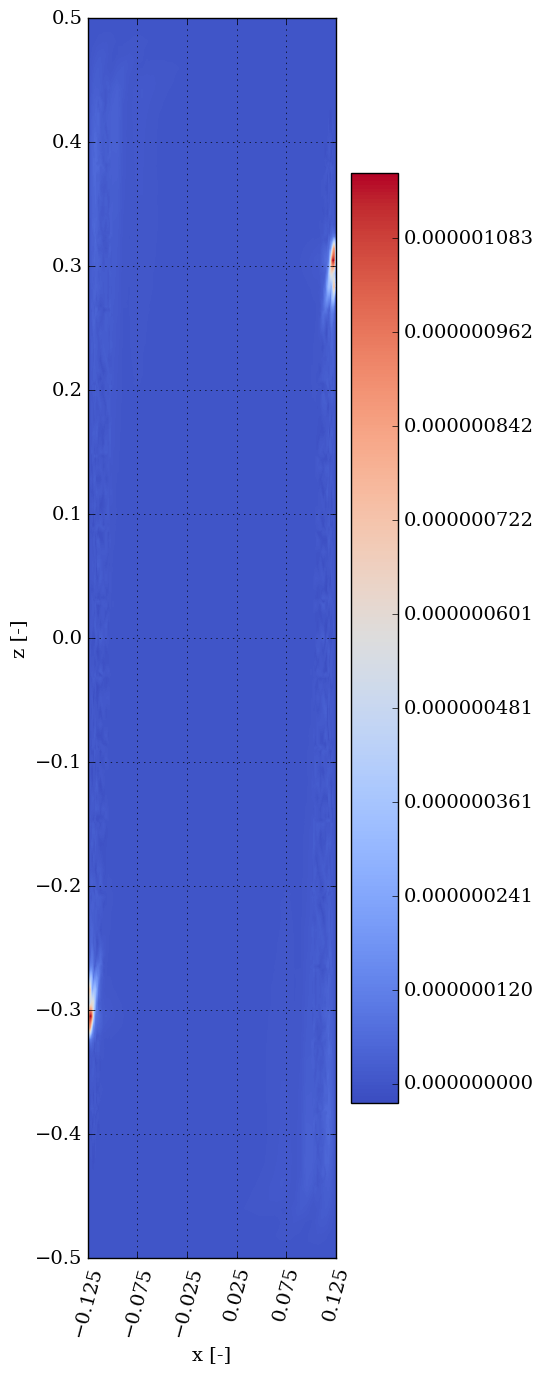

In [115]:
make_plot(mesh_x,mesh_z,(W_rms-W_avg**2),1001)